<h1> Change In Heigh Before And After Skin Removal </h1>


<h2>1. Imports And Data Loading </h2>

In [1]:
# Imports and settigs

import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
%matplotlib inline
from scipy import stats

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)


In [2]:
# Load the data

df = pd.read_csv("height_pre_post.csv")


In [3]:
df

,pre,post
0,16.62,18.41
1,18.86,22.29
2,15.62,18.80
3,20.88,22.90
4,20.74,25.05
5,19.05,21.60
6,19.20,21.70
7,18.70,23.10
8,18.60,22.50
9,17.30,21.40


<h2>2. Statistics </h2>

p-value for non-normality is 0.3346094787120819


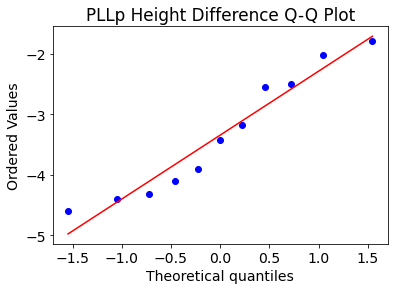

In [4]:
# Test for normality on the difference between conditions.

df['delta'] = df['pre'] - df['post']
stats.probplot(df['delta'], plot= plt)
plt.title('PLLp Height Difference Q-Q Plot')

# Check if the data is normally distributed

print('p-value for non-normality is ' + str(stats.shapiro(df['delta'])[1]))

In [5]:
# Calculate means for each group

mean_pre = df['pre'].mean()
mean_pre = round(mean_pre, 3)
print("average height with skin intact = " + str(mean_pre) + "um")

mean_post = df['post'].mean()
mean_post = round(mean_post, 3)
print("average heigh with skin removed = " + str(mean_post) + "um\n")

# Peform a paired t-test

p_value = stats.ttest_rel(df['pre'], df['post'])


print(str(p_value))

average height with skin intact = 18.325um
average heigh with skin removed = 21.668um

Ttest_relResult(statistic=-11.06116640174224, pvalue=6.260852304127666e-07)


<h2>3. Make The Plot </h2>

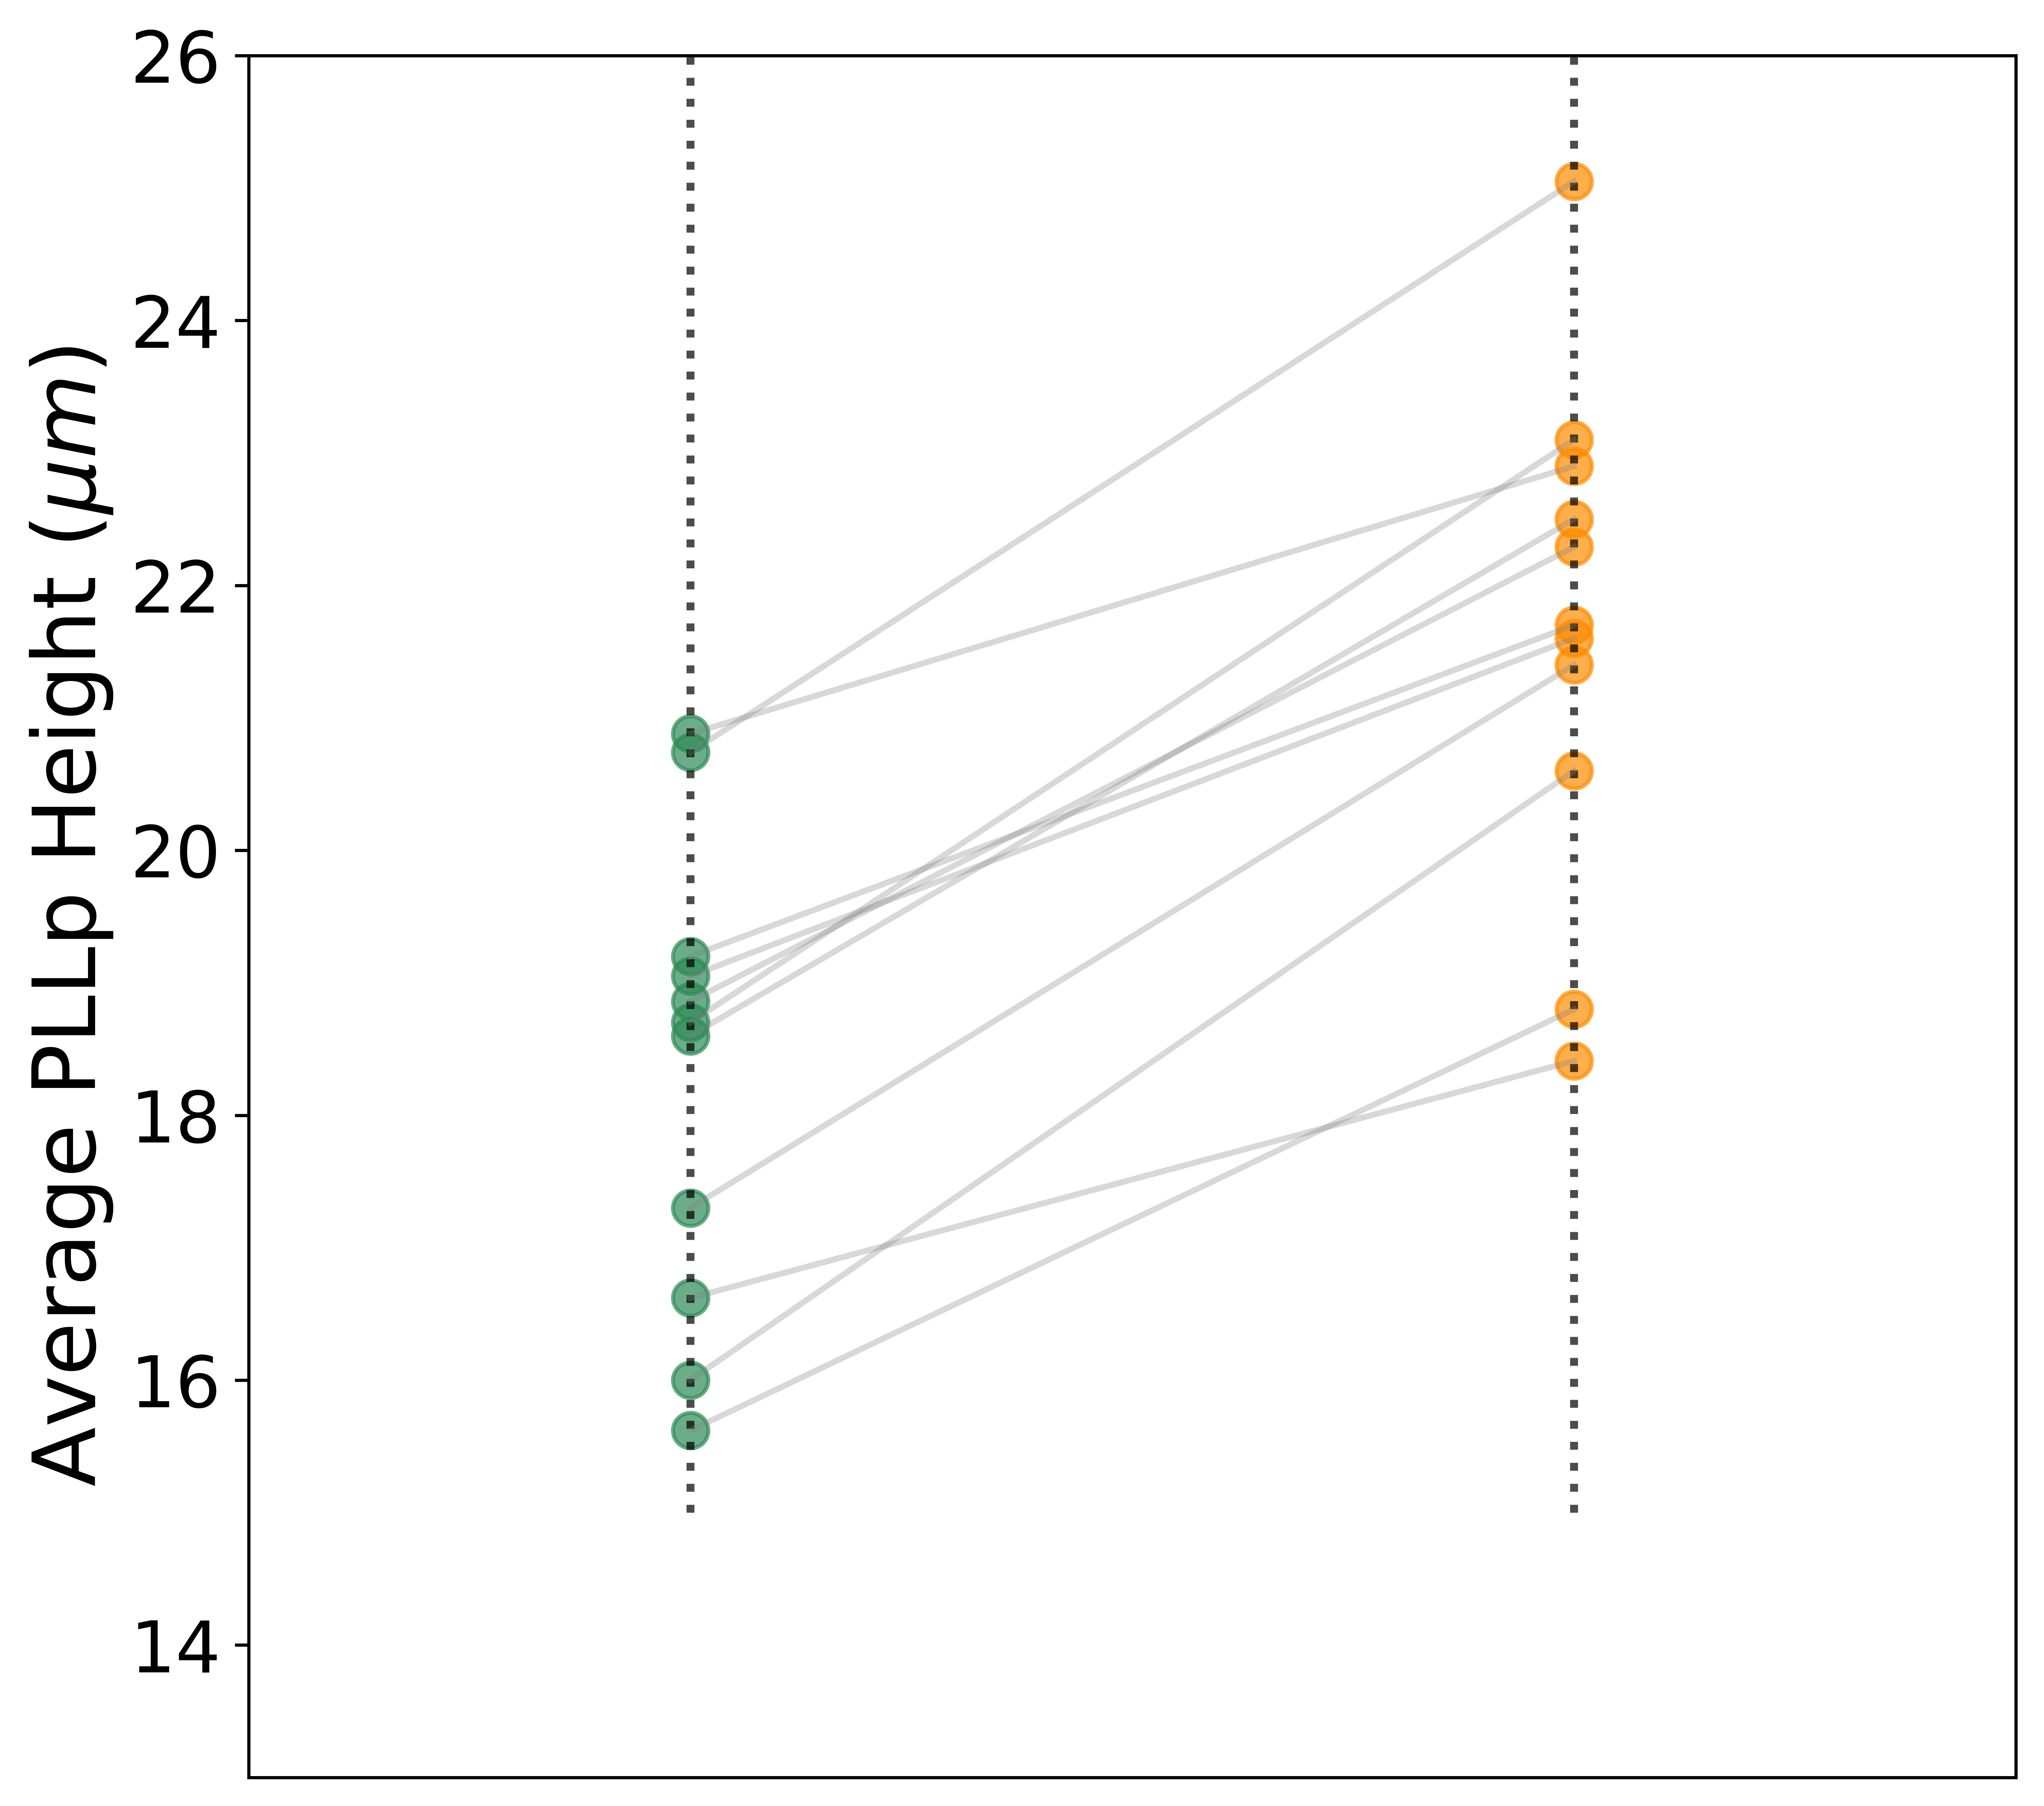

In [13]:
# Make the plot

# Define the function to make lines
def newline(p1, p2, color='black'):
    ax = plt.gca()
    line = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='grey', marker='', alpha = 0.3, markersize=6)
    ax.add_line(line)
    return line

fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 800)


# Calculate means
pre_mean = df['pre'].mean()
post_mean = df['post'].mean()


# Horizontal Lines
ax.vlines(x=0, ymin=15, ymax=30, color='black', alpha=0.7, linewidth=2, linestyles='dotted')
ax.vlines(x=1, ymin=15, ymax=30, color='black', alpha=0.7, linewidth=2, linestyles='dotted')


# Points
ax.scatter(x=np.repeat(0, df.shape[0]), y=df['pre'], s=80, alpha=0.7, color='seagreen')
ax.scatter(x=np.repeat(1, df.shape[0]), y=df['post'], s=80,  alpha=0.7, color='darkorange')

#ax.scatter(y=np.repeat(1, df.shape[0]), x=df['pre'], s=80, alpha=0.7, color='seagreen')
#ax.scatter(y=np.repeat(0, df.shape[0]), x=df['post'], s=80,  alpha=0.7, color='darkorange')


# Connecting lines
for p1, p2 in zip(df['pre'], df['post']):
    newline([0, p1], [1, p2])

    
# Set axis limits and label
ax.set_ylabel('Average PLLp Height 'r'$(\mu m$)', fontsize=22)
ax.set_ylim(13,26)
ax.set_xlim(-0.5,1.5)

ax.set_xlabel('')

# Color the background
#ax.axvspan(-0.5, 0, ymin=0, ymax=1, alpha=0.1, color='red')
#ax.axvspan(0, 1.25, ymin=0, ymax=1, alpha=0.1, color='green')


# Turn off the yticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


ylabs = [12, 14, 16, 18, 20, 22, 24, 26]

ax.set_yticklabels(ylabs, fontsize= 18)

#plt.text(-.15, 14, 'Skin Intact')

#plt.text(.75, 14, 'Skin Removed')


#(optional) save figure to file)
plt.savefig("change_in_height.png", bbox_inches='tight', dpi=800)


